In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Leads X Education.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [3]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.columns=[x.lower() for x in df.columns]
df.columns=df.columns.str.replace(' ','_')

In [7]:
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

# Null Handler

In [8]:
nullCheck=pd.DataFrame()
nullCheck['Number of null values']=df.isnull().sum()
nullCheck['Percentage of Null Values']=(df.isnull().sum() / df.shape[0]) * 100
nullCheck=nullCheck.sort_values('Percentage of Null Values',ascending=False)
nullCheck

,Number of null values,Percentage of Null Values
lead_quality,4767,51.590909
asymmetrique_activity_index,4218,45.649351
asymmetrique_profile_score,4218,45.649351
asymmetrique_activity_score,4218,45.649351
asymmetrique_profile_index,4218,45.649351
tags,3353,36.287879
lead_profile,2709,29.318182
what_matters_most_to_you_in_choosing_a_course,2709,29.318182
what_is_your_current_occupation,2690,29.112554
country,2461,26.634199


In [9]:
df2=df.copy() #df2 to be used after feature importance

In [10]:
df=df.drop(['lead_number','prospect_id'],axis='columns')

In [11]:
df=df.dropna()

In [12]:
Y=df.converted
X=df.drop(['converted'],axis='columns')

In [13]:
# df=df.replace('No',0)

# df=df.replace('Yes',1)

# df=df.replace('b\'No\'',0)

In [14]:
numeric_columns=[x for x in df.select_dtypes(include=np.number).columns]
cat_columns=[x for x in df.select_dtypes(include=np.object).columns]

In [15]:
df[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 2 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   lead_origin                                    1943 non-null   object
 1   lead_source                                    1943 non-null   object
 2   do_not_email                                   1943 non-null   object
 3   do_not_call                                    1943 non-null   object
 4   last_activity                                  1943 non-null   object
 5   country                                        1943 non-null   object
 6   specialization                                 1943 non-null   object
 7   how_did_you_hear_about_x_education             1943 non-null   object
 8   what_is_your_current_occupation                1943 non-null   object
 9   what_matters_most_to_you_in_choosing_a_course  1943 non-null   

In [16]:
numeric_columns

['converted',
 'totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score']

In [17]:
df.converted.unique()

array([1, 0], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)

In [19]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
cbc=CatBoostClassifier(iterations=50,
                       early_stopping_rounds=35)  #102  od_wait= 40

In [20]:
cbc.fit(X_train,Y_train,cat_features=cat_columns,silent=False,eval_set=(X_test,Y_test)) #eval_set=(X_test,Y_test)

Learning rate set to 0.130061
0:	learn: 0.5110686	test: 0.5056565	best: 0.5056565 (0)	total: 233ms	remaining: 11.4s
1:	learn: 0.3789585	test: 0.3698064	best: 0.3698064 (1)	total: 308ms	remaining: 7.4s
2:	learn: 0.3025308	test: 0.2894611	best: 0.2894611 (2)	total: 392ms	remaining: 6.14s
3:	learn: 0.2509475	test: 0.2390622	best: 0.2390622 (3)	total: 471ms	remaining: 5.41s
4:	learn: 0.2118879	test: 0.2012086	best: 0.2012086 (4)	total: 560ms	remaining: 5.04s
5:	learn: 0.1945847	test: 0.1843554	best: 0.1843554 (5)	total: 636ms	remaining: 4.67s
6:	learn: 0.1835014	test: 0.1735867	best: 0.1735867 (6)	total: 697ms	remaining: 4.28s
7:	learn: 0.1721270	test: 0.1636117	best: 0.1636117 (7)	total: 775ms	remaining: 4.07s
8:	learn: 0.1669054	test: 0.1570202	best: 0.1570202 (8)	total: 811ms	remaining: 3.69s
9:	learn: 0.1615259	test: 0.1496181	best: 0.1496181 (9)	total: 874ms	remaining: 3.49s
10:	learn: 0.1514782	test: 0.1391674	best: 0.1391674 (10)	total: 953ms	remaining: 3.38s
11:	learn: 0.1456527	te

In [21]:
# df[cat_columns]=df[cat_columns].astype(str)

In [22]:
cbc.score(X_test,Y_test)

0.9665809768637532

In [23]:
importance=cbc.get_feature_importance()

In [24]:
feature_scores={}
for score, name in sorted(zip(importance,X.columns), reverse=True):
    feature_scores.update({name:score})

Text(0.5, 1.0, 'Feature Importance')

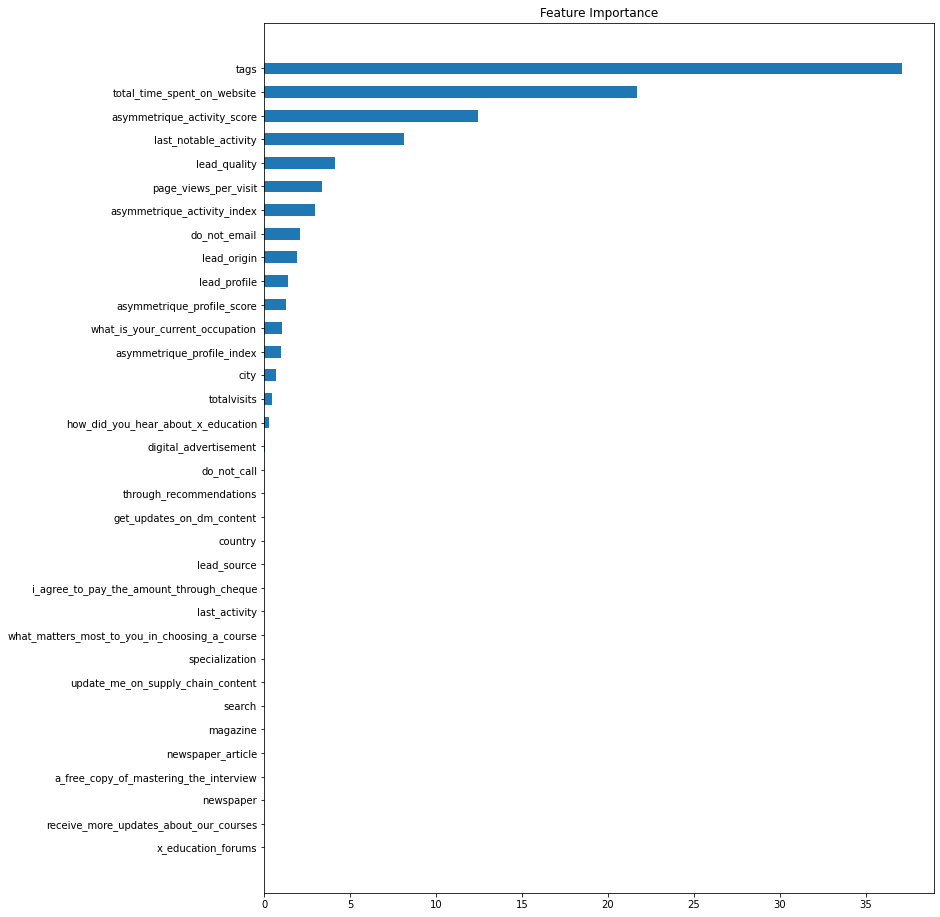

In [25]:
feature_importance = cbc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12,16))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center',height=[0.5])
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

# Feature Understanding based on importance

In [26]:
feature_scores

{'tags': 37.08924843416883,
 'total_time_spent_on_website': 21.677942037907318,
 'asymmetrique_activity_score': 12.452654982353518,
 'last_notable_activity': 8.160708820681798,
 'lead_quality': 4.132239175552834,
 'page_views_per_visit': 3.3495208639803944,
 'asymmetrique_activity_index': 2.9658254664060353,
 'do_not_email': 2.0641329883553965,
 'lead_origin': 1.8955605615416462,
 'lead_profile': 1.3915673741946577,
 'asymmetrique_profile_score': 1.2937832164958347,
 'what_is_your_current_occupation': 1.0382553505881091,
 'asymmetrique_profile_index': 0.9676541295196719,
 'city': 0.7075919768400898,
 'totalvisits': 0.470533038698047,
 'how_did_you_hear_about_x_education': 0.2744108099785794,
 'digital_advertisement': 0.03304870783993044,
 'do_not_call': 0.01842184534036957,
 'through_recommendations': 0.01690021955696071,
 'x_education_forums': 0.0,
 'what_matters_most_to_you_in_choosing_a_course': 0.0,
 'update_me_on_supply_chain_content': 0.0,
 'specialization': 0.0,
 'search': 0.0,


In [27]:
df2=df2.drop(['a_free_copy_of_mastering_the_interview','country','get_updates_on_dm_content',
              'i_agree_to_pay_the_amount_through_cheque','specialization',
             'update_me_on_supply_chain_content','what_matters_most_to_you_in_choosing_a_course',
              'x_education_forums'],axis='columns')

In [28]:
df2.isnull().sum()

prospect_id                                  0
lead_number                                  0
lead_origin                                  0
lead_source                                 36
do_not_email                                 0
do_not_call                                  0
converted                                    0
totalvisits                                137
total_time_spent_on_website                  0
page_views_per_visit                       137
last_activity                              103
how_did_you_hear_about_x_education        2207
what_is_your_current_occupation           2690
search                                       0
magazine                                     0
newspaper_article                            0
newspaper                                    0
digital_advertisement                        0
through_recommendations                      0
receive_more_updates_about_our_courses       0
tags                                      3353
lead_quality 

# Feature Walkthrough

In [29]:
df2.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'search', 'magazine', 'newspaper_article', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score', 'last_notable_activity'],
      dtype='object')

In [30]:
df2.asymmetrique_profile_index.unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [31]:
df2.asymmetrique_activity_index.unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [32]:
df2=df2.drop(['asymmetrique_activity_index','asymmetrique_profile_index'
            ,'asymmetrique_activity_score','asymmetrique_profile_score'],axis='columns')

In [33]:
nullCheck=pd.DataFrame()
nullCheck['Number of null values']=df2.isnull().sum()
nullCheck['Percentage of Null Values']=(df2.isnull().sum() / df2.shape[0]) * 100
nullCheck=nullCheck.sort_values('Percentage of Null Values',ascending=False)
nullCheck

,Number of null values,Percentage of Null Values
lead_quality,4767,51.590909
tags,3353,36.287879
lead_profile,2709,29.318182
what_is_your_current_occupation,2690,29.112554
how_did_you_hear_about_x_education,2207,23.885281
city,1420,15.367965
totalvisits,137,1.482684
page_views_per_visit,137,1.482684
last_activity,103,1.114719
lead_source,36,0.389610


In [34]:
cols_to_remove=[]

In [35]:
df2.lead_quality.unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [36]:
cols_to_remove.append('lead_quality')

In [37]:
df2.tags.unique() # high score of tags, remove null

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [38]:
df2.lead_profile.unique()  # remove null of lead_profile

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [39]:
df2.what_is_your_current_occupation.unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [41]:
df2['what_is_your_current_occupation']=df2.what_is_your_current_occupation.replace(np.nan,'Other')  
#what_is_your_current_occupation handled

In [43]:
df2.how_did_you_hear_about_x_education.unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [44]:
df2['how_did_you_hear_about_x_education']=df2.how_did_you_hear_about_x_education.replace([np.nan,'Select'],'Other')
#how_did_you_hear_about_x_education handled

In [46]:
df2.city.unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [49]:
df2.city=df2.city.replace([np.nan,'Select'],'Other Cities')
# city handled

In [50]:
df2.city.unique()

array(['Other Cities', 'Mumbai', 'Thane & Outskirts',
       'Other Metro Cities', 'Other Cities of Maharashtra',
       'Tier II Cities'], dtype=object)

In [53]:
df2=df2.drop(cols_to_remove,axis='columns')

In [55]:
df2=df2.dropna()

In [59]:
df2.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'search', 'magazine', 'newspaper_article', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_profile',
       'city', 'last_notable_activity'],
      dtype='object')

In [60]:
cleaned_original_df=df2.copy()

In [65]:
df2=df2.drop(['prospect_id','lead_number'],axis='columns')

In [70]:
df2=df2.replace(['No','Yes'],[0,1])

In [71]:
Y=df2.converted
X=df2.drop(['converted'],axis='columns')

In [72]:
numeric_columns=[x for x in X.select_dtypes(include=np.number).columns]
cat_columns=[x for x in X.select_dtypes(include=np.object).columns]

In [73]:
df2[numeric_columns]

,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,page_views_per_visit,search,magazine,newspaper_article,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses
0,0,0,0.0,0,0.00,0,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.00,0,0,0,0,0,0,0
3,0,0,1.0,305,1.00,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.00,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9234,0,0,5.0,210,2.50,0,0,0,0,0,0,0
9235,1,0,8.0,1845,2.67,0,0,0,0,0,0,0
9236,0,0,2.0,238,2.00,0,0,0,0,0,0,0
9237,1,0,2.0,199,2.00,0,0,0,0,0,0,0


In [74]:
df2[cat_columns]

,lead_origin,lead_source,last_activity,how_did_you_hear_about_x_education,what_is_your_current_occupation,tags,lead_profile,city,last_notable_activity
0,API,Olark Chat,Page Visited on Website,Other,Unemployed,Interested in other courses,Select,Other Cities,Modified
1,API,Organic Search,Email Opened,Other,Unemployed,Ringing,Select,Other Cities,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Other,Student,Will revert after reading the email,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Word Of Mouth,Unemployed,Ringing,Select,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,Other,Unemployed,Will revert after reading the email,Select,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,SMS Sent,Other,Unemployed,Will revert after reading the email,Potential Lead,Mumbai,Modified
9235,Landing Page Submission,Direct Traffic,Email Marked Spam,Other,Unemployed,Will revert after reading the email,Potential Lead,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,Other,Unemployed,wrong number given,Potential Lead,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Other,Unemployed,invalid number,Potential Lead,Mumbai,SMS Sent


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)

In [82]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
cbc=CatBoostClassifier(iterations=40)  #102  od_wait= 40

In [88]:
cbc.fit(X_train,Y_train,cat_features=cat_columns,silent=False) #eval_set=(X_test,Y_test)

Learning rate set to 0.375907
0:	learn: 0.2811139	total: 99.1ms	remaining: 3.87s
1:	learn: 0.1782795	total: 199ms	remaining: 3.77s
2:	learn: 0.1396542	total: 314ms	remaining: 3.87s
3:	learn: 0.1285301	total: 432ms	remaining: 3.89s
4:	learn: 0.1170707	total: 544ms	remaining: 3.81s
5:	learn: 0.1123369	total: 662ms	remaining: 3.75s
6:	learn: 0.1097724	total: 776ms	remaining: 3.66s
7:	learn: 0.1046260	total: 886ms	remaining: 3.54s
8:	learn: 0.1039314	total: 1.01s	remaining: 3.47s
9:	learn: 0.1037520	total: 1.12s	remaining: 3.37s
10:	learn: 0.1027027	total: 1.22s	remaining: 3.23s
11:	learn: 0.1024749	total: 1.33s	remaining: 3.11s
12:	learn: 0.0993388	total: 1.45s	remaining: 3s
13:	learn: 0.0990476	total: 1.55s	remaining: 2.89s
14:	learn: 0.0983766	total: 1.66s	remaining: 2.77s
15:	learn: 0.0951445	total: 1.77s	remaining: 2.66s
16:	learn: 0.0942967	total: 1.89s	remaining: 2.56s
17:	learn: 0.0934853	total: 2s	remaining: 2.44s
18:	learn: 0.0927375	total: 2.11s	remaining: 2.33s
19:	learn: 0.090

In [89]:
cbc.score(X_test,Y_test)

0.9594356261022927

In [90]:
probs=cbc.predict_proba(X_test)

In [91]:
scores=[]
scores_raw_test=[]
for i in range(len(probs)):
    scores_raw_test.append(probs[i][1])

In [92]:
scores_raw_test

[0.027700598239118475,
 0.934284651658927,
 0.0002183806175868597,
 0.024464713929737644,
 0.8236942994725506,
 0.012295199014105135,
 0.003669246135424013,
 0.9460128194538017,
 0.2766790640013976,
 0.9973235748117947,
 0.9974227796413749,
 0.015015841878470666,
 0.9955506320014961,
 0.004377639647853311,
 0.06560522929577693,
 0.007284173932522181,
 0.031202131289983295,
 0.0014516650414928658,
 0.8497410881432156,
 0.9941056372149778,
 0.9951869925189775,
 0.6807210402464247,
 0.016372278592152484,
 0.0030610334118020784,
 0.9945867253029914,
 0.0064259971494386526,
 0.9980021068465362,
 0.008826946531048983,
 0.9961547154944136,
 0.8930110762651788,
 0.028296262789866397,
 0.98514145618148,
 0.9739203340225295,
 0.9767745453581417,
 0.18434531349783181,
 0.004221152785946127,
 0.9970077877184493,
 0.016889105217373544,
 0.0006007685208255722,
 0.006757841399433168,
 0.9485938074910536,
 0.8996290569304951,
 0.015806164110285407,
 0.006466319049043637,
 0.08052685929088832,
 0.02108

In [93]:
Y_predicted_test=cbc.predict(X_test)
Y_predicted_train=cbc.predict(X_train)
Y_predicted_total=cbc.predict(X)

In [94]:
probs_train=cbc.predict_proba(X_train)
probs_train=[x[1] for x in probs_train]

probs_test=cbc.predict_proba(X_test)
probs_test=[x[1] for x in probs_test]

probs_total=cbc.predict_proba(X)
probs_total=[x[1] for x in probs_total]

In [95]:
result_metrics = pd.DataFrame(columns=['cutoff','train_acc','train_sen','train_spec','train_prec',
                                      'test_acc','test_sen','test_spec','test_prec'])

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
fpr, tpr, thresholds = roc_curve(Y_train,probs_train, drop_intermediate = False )

In [98]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [99]:
optimal_threshold

0.30039489722612744

In [102]:
optimal_score=optimal_threshold

In [104]:
len(probs_total)

5666

In [105]:
df2['Scores']=probs_total

In [107]:
df2['Scores']=df2['Scores']*100

In [110]:
test_converted=df2.converted

In [111]:
df2=df2.drop(['converted'],axis='columns')

In [112]:
df2

,lead_origin,lead_source,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,how_did_you_hear_about_x_education,what_is_your_current_occupation,...,newspaper_article,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_profile,city,last_notable_activity,Scores
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Other,Unemployed,...,0,0,0,0,0,Interested in other courses,Select,Other Cities,Modified,0.176905
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Other,Unemployed,...,0,0,0,0,0,Ringing,Select,Other Cities,Email Opened,4.512906
2,Landing Page Submission,Direct Traffic,0,0,2.0,1532,2.00,Email Opened,Other,Student,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,Email Opened,99.383909
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Word Of Mouth,Unemployed,...,0,0,0,0,0,Ringing,Select,Mumbai,Modified,0.323706
4,Landing Page Submission,Google,0,0,2.0,1428,1.00,Converted to Lead,Other,Unemployed,...,0,0,0,0,0,Will revert after reading the email,Select,Mumbai,Modified,98.055749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,0,0,5.0,210,2.50,SMS Sent,Other,Unemployed,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,Modified,95.037407
9235,Landing Page Submission,Direct Traffic,1,0,8.0,1845,2.67,Email Marked Spam,Other,Unemployed,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,Email Marked Spam,99.402795
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Other,Unemployed,...,0,0,0,0,0,wrong number given,Potential Lead,Mumbai,SMS Sent,2.604546
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Other,Unemployed,...,0,0,0,0,0,invalid number,Potential Lead,Mumbai,SMS Sent,2.589985
